# 03 - Topic Modeling & Narrative Depth
## Grammy Song of the Year 2026 Prediction

This notebook analyzes lyrical themes and narrative depth:
- Topic extraction from lyrics
- Alignment with Grammy-winning themes
- Narrative complexity scoring

In [11]:
import sys
sys.path.insert(0, '../src')

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path
from math import pi

from data_sources import SONG_UNIVERSE
from feature_engineering import NarrativeDepthAnalyzer, GRAMMY_TOPIC_KEYWORDS, GRAMMY_TOPIC_WEIGHTS

print("Imports successful!")

Imports successful!


## 1. Load Data

In [12]:
# Load all data
data_dir = Path('../data')

with open(data_dir / 'all_data.json', 'r') as f:
    all_data = json.load(f)

print(f"Loaded data for {len(all_data)} songs")

Loaded data for 8 songs


## 2. Grammy-Valued Themes

In [13]:
# Display Grammy topic weights
print("Grammy-Valued Themes (by importance):")
print("="*50)

sorted_weights = sorted(GRAMMY_TOPIC_WEIGHTS.items(), key=lambda x: x[1], reverse=True)
for theme, weight in sorted_weights:
    name = theme.replace('_', ' ').title()
    print(f"  {name}: {weight*100:.0f}%")
    if theme in GRAMMY_TOPIC_KEYWORDS:
        keywords = ', '.join(GRAMMY_TOPIC_KEYWORDS[theme][:5])
        print(f"    Keywords: {keywords}")

Grammy-Valued Themes (by importance):
  Emotional Vulnerability: 20%
    Keywords: feel, heart, cry, tears, pain
  Social Commentary: 15%
    Keywords: world, society, change, fight, stand
  Love Heartbreak: 15%
    Keywords: love, heart, miss, want, need
  Self Reflection: 15%
    Keywords: think, wonder, know, believe, feel
  Personal Growth: 10%
    Keywords: learn, grow, change, become, find
  Authenticity: 10%
    Keywords: real, true, honest, myself, who
  Cultural Moment: 5%
    Keywords: time, now, today, generation, era
  Artistic Innovation: 5%
    Keywords: new, different, unique, create, imagine
  Universal Experience: 5%
    Keywords: we, us, everyone, human, life
  Storytelling: 0%
    Keywords: story, tell, remember, once, then


## 3. Initialize Topic Analyzer

In [14]:
# Initialize narrative depth analyzer
analyzer = NarrativeDepthAnalyzer(use_bertopic=False)  # Use keyword-based fallback
print("Narrative Depth Analyzer initialized.")

Narrative Depth Analyzer initialized.


## 4. Analyze Theme Distribution

In [15]:
# Analyze themes for each song
lyrics_dict = {song: data['lyrics'] for song, data in all_data.items()}

print("Analyzing narrative depth...")
narrative_scores = analyzer.analyze_all_songs(lyrics_dict, use_bertopic=False)

print("\nNarrative Depth Scores:")
for song, scores in narrative_scores.items():
    print(f"  {song}:")
    print(f"    Alignment: {scores['narrative_alignment_score']:.3f}")
    print(f"    Complexity: {scores['narrative_complexity_score']:.3f}")
    print(f"    Overall: {scores['narrative_depth_score']:.3f}")

Analyzing narrative depth...

Narrative Depth Scores:
  Golden:
    Alignment: 0.150
    Complexity: 0.453
    Overall: 0.271
  APT.:
    Alignment: 0.255
    Complexity: 0.493
    Overall: 0.350
  WILDFLOWER:
    Alignment: 0.426
    Complexity: 0.738
    Overall: 0.551
  Abracadabra:
    Alignment: 0.285
    Complexity: 0.715
    Overall: 0.457
  luther:
    Alignment: 0.367
    Complexity: 0.739
    Overall: 0.516
  Manchild:
    Alignment: 0.155
    Complexity: 0.372
    Overall: 0.242
  Anxiety:
    Alignment: 0.437
    Complexity: 0.605
    Overall: 0.505
  DtMF:
    Alignment: 0.111
    Complexity: 0.160
    Overall: 0.130


In [16]:
# Create narrative DataFrame
narrative_data = []
for song, scores in narrative_scores.items():
    narrative_data.append({
        'Song': song,
        'Alignment Score': round(scores['narrative_alignment_score'], 3),
        'Complexity Score': round(scores['narrative_complexity_score'], 3),
        'Narrative Depth': round(scores['narrative_depth_score'], 3),
        'Dominant Themes': ', '.join(scores.get('dominant_themes', [])[:3])
    })

narrative_df = pd.DataFrame(narrative_data)
narrative_df = narrative_df.sort_values('Narrative Depth', ascending=False)
print("\nNarrative Depth Rankings:")
display(narrative_df)


Narrative Depth Rankings:


,Song,Alignment Score,Complexity Score,Narrative Depth,Dominant Themes
2,WILDFLOWER,0.426,0.738,0.551,"universal_experience, self_reflection, cultura..."
4,luther,0.367,0.739,0.516,"universal_experience, authenticity, social_com..."
6,Anxiety,0.437,0.605,0.505,"self_reflection, emotional_vulnerability, univ..."
3,Abracadabra,0.285,0.715,0.457,"universal_experience, authenticity, love_heart..."
1,APT.,0.255,0.493,0.350,"love_heartbreak, universal_experience, cultura..."
0,Golden,0.150,0.453,0.271,"authenticity, universal_experience, cultural_m..."
5,Manchild,0.155,0.372,0.242,"universal_experience, authenticity"
7,DtMF,0.111,0.160,0.130,authenticity


## 5. Theme Presence Heatmap

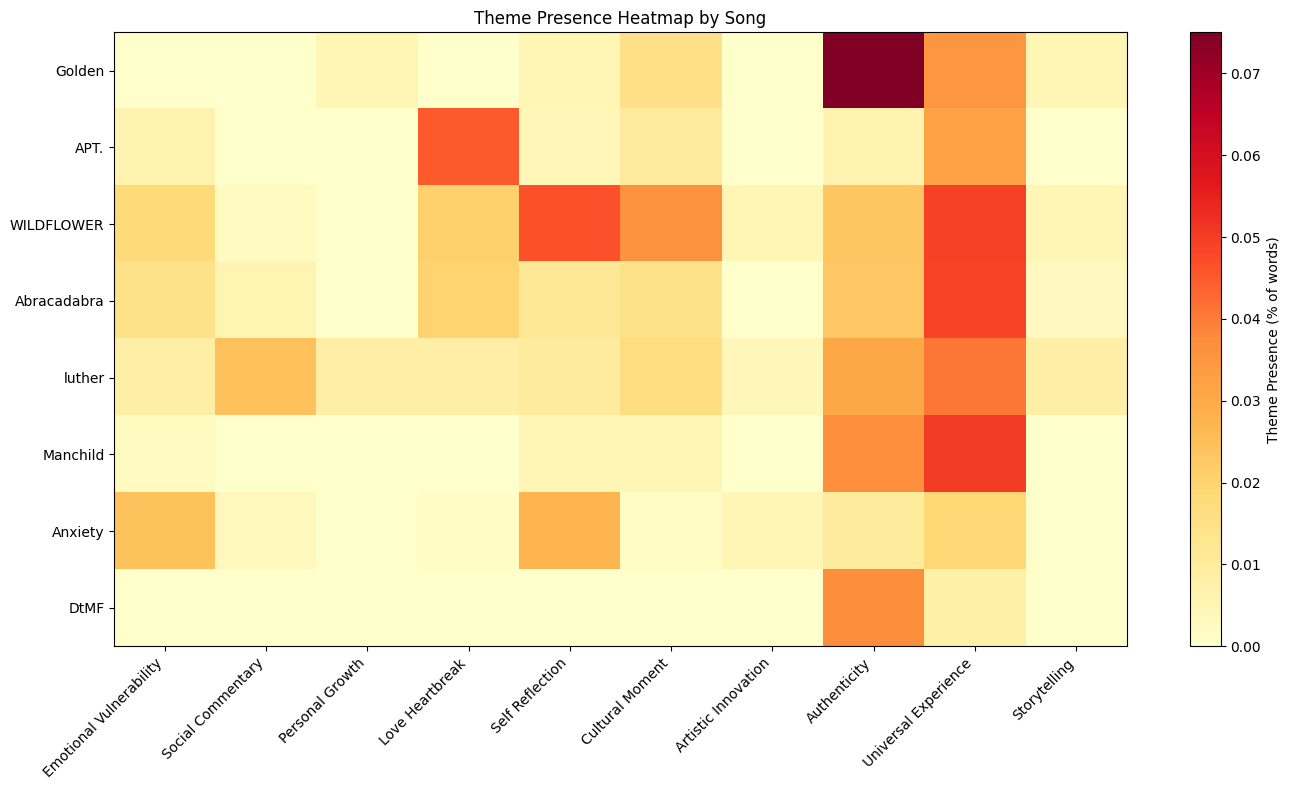

In [17]:
# Compute theme presence for each song
theme_presence = {}

for song, data in all_data.items():
    lyrics = data['lyrics']['lyrics'].lower()
    words = lyrics.split()
    total_words = max(len(words), 1)
    
    theme_scores = {}
    for theme, keywords in GRAMMY_TOPIC_KEYWORDS.items():
        count = sum(1 for word in words if any(kw in word for kw in keywords))
        theme_scores[theme] = count / total_words
    
    theme_presence[song] = theme_scores

# Create heatmap data
themes = list(GRAMMY_TOPIC_KEYWORDS.keys())
songs = list(theme_presence.keys())

heatmap_data = []
for song in songs:
    row = [theme_presence[song].get(theme, 0) for theme in themes]
    heatmap_data.append(row)

heatmap_df = pd.DataFrame(heatmap_data, index=songs, columns=[t.replace('_', ' ').title() for t in themes])

# Plot heatmap
fig, ax = plt.subplots(figsize=(14, 8))
im = ax.imshow(heatmap_df.values, cmap='YlOrRd', aspect='auto')

ax.set_xticks(range(len(heatmap_df.columns)))
ax.set_yticks(range(len(heatmap_df.index)))
ax.set_xticklabels(heatmap_df.columns, rotation=45, ha='right')
ax.set_yticklabels(heatmap_df.index)

plt.colorbar(im, label='Theme Presence (% of words)')
ax.set_title('Theme Presence Heatmap by Song')

plt.tight_layout()
plt.savefig('../data/theme_heatmap.png', dpi=150)
plt.show()

## 6. Radar Charts - Top 3 Songs

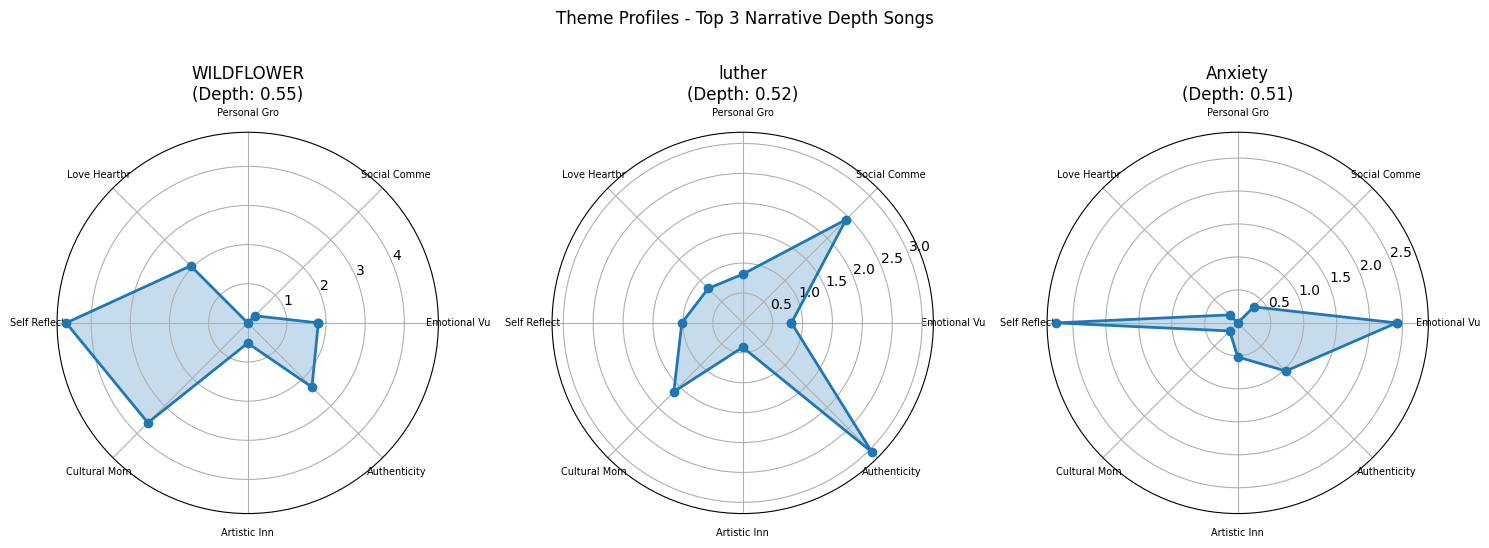

In [18]:
# Radar charts for top 3 narrative depth songs
top_3 = narrative_df.head(3)['Song'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw=dict(projection='polar'))

categories = [t.replace('_', ' ').title()[:12] for t in themes[:8]]  # Limit to 8 themes
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for idx, (ax, song) in enumerate(zip(axes, top_3)):
    values = [theme_presence[song].get(themes[i], 0) * 100 for i in range(8)]
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=7)
    ax.set_title(f"{song}\n(Depth: {narrative_df[narrative_df['Song']==song]['Narrative Depth'].values[0]:.2f})")

plt.suptitle('Theme Profiles - Top 3 Narrative Depth Songs', y=1.05)
plt.tight_layout()
plt.savefig('../data/theme_radar.png', dpi=150)
plt.show()

## 7. Save Results

In [19]:
# Save narrative scores
with open('../data/narrative_scores.json', 'w') as f:
    json.dump(narrative_scores, f, indent=2)

# Save theme presence
with open('../data/theme_presence.json', 'w') as f:
    json.dump(theme_presence, f, indent=2)

narrative_df.to_csv('../data/narrative_analysis.csv', index=False)

print("Saved:")
print("  • narrative_scores.json")
print("  • theme_presence.json")
print("  • narrative_analysis.csv")

Saved:
  • narrative_scores.json
  • theme_presence.json
  • narrative_analysis.csv


## Summary

Key findings:
1. **Narrative Alignment** - How well themes match Grammy preferences
2. **Narrative Complexity** - Diversity and depth of themes
3. **Dominant Themes** - Primary lyrical themes per song

**Next:** Notebook 04 - Media Sentiment Deep Dive